# Question 8 Solutions using Data from Q5

Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all the overall ratings for each season and using plots compare the ratings for all the 
seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season

In [1]:
# Import packages and data

In [2]:
import pandas as pd
df = pd.read_csv("westworld.csv")

In [3]:
df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'runtime', 'summary', 'medium_image_link', 'original_image_link',
       'average_rating'],
      dtype='object')

### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [10]:
result = df.groupby('season').agg({'average_rating': 'mean'})

In [27]:
result.rename(columns = {'average_rating': 'overall_rating'}, inplace=True)
result

,overall_rating
season,
1,8.0900
2,8.0000
3,7.7750
4,7.5375


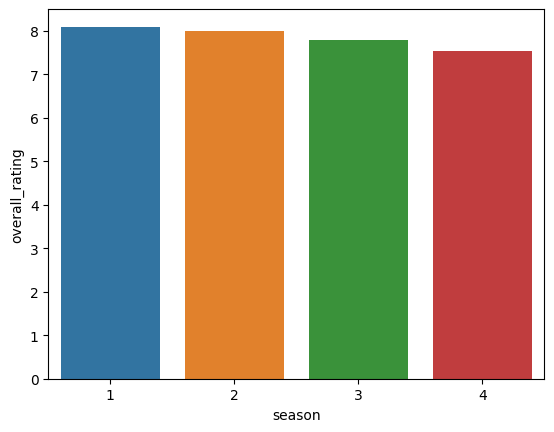

In [29]:
sns.barplot(data=result, y='overall_rating', x=result.index)
plt.show()

We can clearly see that the overall ratings has gradually decreased over the seasons, with season 1 having the highest overall rating.

### Get all the episode names, whose average rating is more than 8 for every season

In [31]:
episodes_with_rating_more_than_8 = list(df[df['average_rating'] > 8]['name'])
episodes_with_rating_more_than_8

["Trompe L'Oeil",
 'The Well-Tempered Clavier',
 'The Bicameral Mind',
 'Kiksuya',
 'Vanishing Point',
 'The Passenger']

### Get all the episode names that aired before May 2019

In [32]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,summary,medium_image_link,original_image_link,average_rating
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00PM,68,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,8.0
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00PM,60,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,7.7
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00PM,60,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,7.6
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00PM,60,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,7.9
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00PM,60,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,8.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season               36 non-null     int64  
 4   number               36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   runtime              36 non-null     int64  
 9   summary              36 non-null     object 
 10  medium_image_link    36 non-null     object 
 11  original_image_link  36 non-null     object 
 12  average_rating       36 non-null     float64
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


In [35]:
import datetime as dt

df['airdate'] = pd.to_datetime(df['airdate'])
df['airdate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36 entries, 0 to 35
Series name: airdate
Non-Null Count  Dtype         
--------------  -----         
36 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 416.0 bytes


In [36]:
df.loc[0, 'airdate']

Timestamp('2016-10-02 00:00:00')

In [44]:
date_cutoff = dt.date(2019, 5, 1)
episodes_before_May_2019 = list(df[df['airdate'].dt.date < date_cutoff]['name'])
episodes_before_May_2019

['The Original',
 'Chestnut',
 'The Stray',
 'Dissonance Theory',
 'Contrapasso',
 'The Adversary',
 "Trompe L'Oeil",
 'Trace Decay',
 'The Well-Tempered Clavier',
 'The Bicameral Mind',
 'Journey Into Night',
 'Reunion',
 'Virtù e Fortuna',
 'The Riddle of the Sphinx',
 'Akane No Mai',
 'Phase Space',
 'Les Écorchés',
 'Kiksuya',
 'Vanishing Point',
 'The Passenger']

### Get the episode name from each season with the highest and lowest rating

In [52]:
max_rating = df.groupby('season').agg({'average_rating': 'max'}).reset_index()
max_rating

,season,average_rating
0,1,8.7
1,2,8.7
2,3,8.0
3,4,7.8


In [51]:
ratings = list(max_rating["average_rating"].values)

for i in range(1, len(ratings)+1):
    print(f'Season {i}: {df[(df["season"]==i) & (df["average_rating"]==ratings[i-1])]["name"].values[0]}')

Season 1: The Bicameral Mind
Season 2: Kiksuya
Season 3: Parce Domine
Season 4: Zhuangzi


In [53]:
min_rating = df.groupby('season').agg({'average_rating': 'min'}).reset_index()
min_rating

,season,average_rating
0,1,7.6
1,2,7.6
2,3,7.5
3,4,7.1


In [58]:
ratings = list(min_rating["average_rating"].values)

for i in range(1, len(ratings)+1):
    print(f'Season {i}: {df[(df["season"]==i) & (df["average_rating"]==ratings[i-1])]["name"].values[0]}')

Season 1: The Stray
Season 2: Akane No Mai
Season 3: Decoherence
Season 4: The Auguries


### Get the summary for the most popular ( ratings ) episode in every season

In [59]:
max_rating = df.groupby('season').agg({'average_rating': 'max'}).reset_index()
max_rating

,season,average_rating
0,1,8.7
1,2,8.7
2,3,8.0
3,4,7.8


In [60]:
ratings = list(max_rating["average_rating"].values)

for i in range(1, len(ratings)+1):
    print(f'Season {i}: {df[(df["season"]==i) & (df["average_rating"]==ratings[i-1])]["summary"].values[0]}')

Season 1: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.
Season 2: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.
Season 3: If you're stuck in a loop, try walking in a straight line.
Season 4: God is bored.
